<style>
div.cell, div.text_cell_render{
  max-width:760px;
  margin-left:auto;
  margin-right:auto;
}

.rendered_html
{
  font-size: 130%;
  }

.rendered_html li
{
  line-height: 1.;
  }

.rendered_html h1, h2 {
  font-familly:"Charis SIL", serif;
}

img { 
    max-width: 200% !important;
    height: auto !important;
}

.input_prompt, .CodeMirror-lines, .output_area
{
  font-family: Consolas, monospace;
  font-size: 120%;
}
</style>

# Pandas
We use materials, and ideas from the tutorials of [Greg Reda](https://github.com/gjreda/pydata2014nyc/blob/master/demo.ipynb) and [Tom Augspurger](http://tomaugspurger.github.io/modern-1.html).


We now introduce and explore [Pandas](http://pandas.pydata.org/), a library for data analysis that makes the following (and more) very straightforward:
- Reading in data
- Cleaning it up
- Basic analysis
- Plotting

Pandas brings tools and ideas from Excel, R, and SQL to Python.

We'll have a look at the basic data structures: Series and Dataframes. Then we'll look at a dataset about the passengers of the Titanic.

<img src="titanic.jpg" alt="Titanitc" width="300">




# Part I: Pandas and its data structures
## Series and Dataframes



In [2]:
#we typically import pandas with the alias pd (a la import numpy as np)
import pandas as pd
import numpy as np

Pandas has two primary data structures: series and dataframes. Series are similar to Python lists or numpy vectors: they are one dimensional. They are more flexible. They can contain ***mixed types***!

In [3]:
#create a series
my_first_series = pd.Series([3.0,2,1,'shoe',1.5,['apple','banana'],2,3.0,100])
print(my_first_series)

0                3.0
1                  2
2                  1
3               shoe
4                1.5
5    [apple, banana]
6                  2
7                3.0
8                100
dtype: object


When we create the series, notice that we also get a column number each row. This is the index of our series. 

In [4]:
#access the values and indices:
print(my_first_series.values)
print(my_first_series.index)

[3.0 2 1 'shoe' 1.5 list(['apple', 'banana']) 2 3.0 100]
RangeIndex(start=0, stop=9, step=1)


What's the advantage? Well we can look up values by their index using the same list/numpy slicing syntax we know:

In [126]:
print(my_first_series[2:5])

2       1
3    shoe
4     1.5
dtype: object


In [127]:
#note if we look up a single row, the Series returns the value!
print(my_first_series[3])

shoe


At the same time we can filter based on values:

In [9]:
just_threes= my_first_series[
    (my_first_series == 3) #| (my_first_series == 'shoe') #& and syntax
]
#return the rows with the matching value
print(just_threes)

0    3.0
7    3.0
dtype: object


If our Series has all the same types, we can apply numpy functions to the entire array:

In [10]:
print( just_threes*2)

def square(x):
    return x**2

print( just_threes.apply(square))

0    6.0
7    6.0
dtype: object
0    9.0
7    9.0
dtype: float64


We can convert Python dictionaries to Pandas Series:

In [15]:
#let's create a dict of the average movie ratings from 1 to 10 of actors.
actor_rating_dict = {'Nicolas Cage':10,'Robert Redford':5,'Julianne Moore':8,
                     'Jeff Bridges':7, 'Idris Elba':8,'Meryl Streep':9,
                     'Pam Grier':9
                     }
actor_rating_series =pd.Series(actor_rating_dict)
#note the keys are mapped to indices! The index is NOT always numeric!
print (actor_rating_series)

Nicolas Cage      10
Robert Redford     5
Julianne Moore     8
Jeff Bridges       7
Idris Elba         8
Meryl Streep       9
Pam Grier          9
dtype: int64


In [16]:
#look up by index name
print(actor_rating_series['Idris Elba'])
#look up by index position
print(actor_rating_series[0])

8
10


In [17]:
#creating another series: this time how many movies an actor has played in.
actor_frequency_dict = {'Nicolas Cage':20,'Robert Redford':6,
                        'Julianne Moore':10, 'Jeff Bridges':2,
                        'Idris Elba':14,'Mr. Bean':3,'Meryl Streep':7,
                        'Pam Grier':11}

actor_frequency_series = pd.Series(actor_frequency_dict)
actor_frequency_series

Nicolas Cage      20
Robert Redford     6
Julianne Moore    10
Jeff Bridges       2
Idris Elba        14
Mr. Bean           3
Meryl Streep       7
Pam Grier         11
dtype: int64

In [76]:
#Cast to a numpy array by using .values
actor_frequency_series.values

array([20,  6, 10,  2, 14,  3,  7, 11])

### We can combine series with the concat command. What results is a Dataframe!

In [20]:
df = pd.concat([actor_rating_series,actor_frequency_series],axis=1)#if axis = 0 then it just puts them on top of eachother
df


,0,1
Nicolas Cage,10.0,20
Robert Redford,5.0,6
Julianne Moore,8.0,10
Jeff Bridges,7.0,2
Idris Elba,8.0,14
Meryl Streep,9.0,7
Pam Grier,9.0,11
Mr. Bean,NaN,3


### Question 1
What happens if we exclude axis=1 from the concat command?

### Question 2
What does Mr. Bean's "NaN" mean?

In [60]:
#try it!

In [21]:
#let's rename the columns:
df.columns = ['Average_Rating','Number_of_Movies']
df


,Average_Rating,Number_of_Movies
Nicolas Cage,10.0,20
Robert Redford,5.0,6
Julianne Moore,8.0,10
Jeff Bridges,7.0,2
Idris Elba,8.0,14
Meryl Streep,9.0,7
Pam Grier,9.0,11
Mr. Bean,NaN,3


In [25]:
#there are two ways to access columns. what's the difference? Google it!
df['Average_Rating']

Nicolas Cage      10.0
Robert Redford     5.0
Julianne Moore     8.0
Jeff Bridges       7.0
Idris Elba         8.0
Meryl Streep       9.0
Pam Grier          9.0
Mr. Bean           NaN
Name: Average_Rating, dtype: float64

In [26]:
df.Average_Rating

Nicolas Cage      10.0
Robert Redford     5.0
Julianne Moore     8.0
Jeff Bridges       7.0
Idris Elba         8.0
Meryl Streep       9.0
Pam Grier          9.0
Mr. Bean           NaN
Name: Average_Rating, dtype: float64

In [81]:
#we can query rows by index using index value (loc) or position (iloc).
print( df.loc['Mr. Bean'])
print( '-------------')
print( df.iloc[3] )
print( '-------------')

Average_Rating      NaN
Number_of_Movies    3.0
Name: Mr. Bean, dtype: float64
-------------
Average_Rating      7.0
Number_of_Movies    2.0
Name: Jeff Bridges, dtype: float64
-------------


### We can change values directly. Let's guess that Mr. Bean has the same rating as the average of everyone else:

In [140]:
#access a column using df.column_name, note we get a Series back:
print( df['Average_Rating'])

avg=np.mean(df['Average_Rating'])
print( 'Average of Average Rating = '+str(avg) )

avg=np.mean(df['Average_Rating'])
#access the value first by column, then by index:
df.loc['Mr. Bean','Average_Rating'] = avg
df

Nicolas Cage      10.0
Robert Redford     5.0
Julianne Moore     8.0
Jeff Bridges       7.0
Idris Elba         8.0
Meryl Streep       9.0
Pam Grier          9.0
Mr. Bean           NaN
Name: Average_Rating, dtype: float64
Average of Average Rating = 8.0


,Average_Rating,Number_of_Movies
Nicolas Cage,10.0,20
Robert Redford,5.0,6
Julianne Moore,8.0,10
Jeff Bridges,7.0,2
Idris Elba,8.0,14
Meryl Streep,9.0,7
Pam Grier,9.0,11
Mr. Bean,8.0,3


## But this is not the 'right' way to fill in values. Pandas comes with a built in function to handle this:

In [25]:
avg=np.mean(df['Average_Rating'])
df.Average_Rating=df.Average_Rating.fillna(avg)
df

,Average_Rating,Number_of_Movies
Nicolas Cage,10.0,20
Robert Redford,5.0,6
Julianne Moore,8.0,10
Jeff Bridges,7.0,2
Idris Elba,8.0,14
Meryl Streep,9.0,7
Pam Grier,9.0,11
Mr. Bean,75.0,3


### Pandas has built in plotting. It sits 'on top of' matplotlib and so can be customized in the same way. 

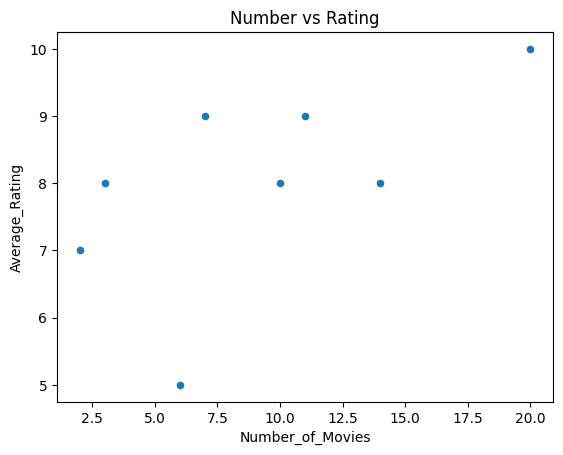

In [86]:
ax=df.plot(kind='scatter',x='Number_of_Movies',y='Average_Rating')
ax.set_title('Number vs Rating');

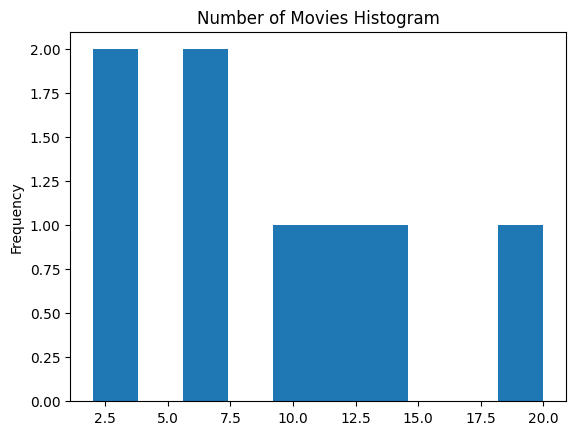

In [87]:

ax=df.Number_of_Movies.plot(kind='hist')
ax.set_title('Number of Movies Histogram');

# Part II: Surviving The Titanic

Pandas has great data manipulation abilities. Let's consider some real world data. Today we will have a look at passenger data from the Titanic, a famous ship which sunk on its maiden voyage. Of 2,224 passengers and crew, more than 1,500 died.

This is how the file looks like:

In [35]:
!head titanic.csv 

'head' is not recognized as an internal or external command,
operable program or batch file.


Reading from a csv in pandas is very easy! `read_csv` is very flexible: can take `txt`, plain files, and many more.

In [36]:
df=pd.read_csv('titanic.csv',header=0,sep=',')

`header = 0` indicates that the first row is the header. In this case it is not necessary. `sep` is the column seperator, other examples include tabs (\t), white space, |, and more

Head method reads the first five rows:

In [37]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Tail method reads the last five rows:

In [38]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Some more information about the data:
- Pclass: passenger class. 
- SibSp: number of siblings+spouses aboard
- Parch: number of parents+children aboard
- Fare: cost of ticket
- Cabin: room ID, if passenger had a room
- Embarked: port of departure (C= Cherbourg; Q= Queenstown; S=Southampton)

### Let's check out a few data exploration techniques

In [39]:
#number of rows:
len(df)

891

In [40]:
#Index object of columns - can be treated like a list.
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
#describe numeric columns - note that NaNs are ignored!
df.describe().round(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [41]:
#method to count the number of rows by entry in a specific column
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Pandas has powerful grouping methods. Let's check out the average survival rate by passenger class

In [43]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### What about "women and children first"? Does sex relate to survival rate?

In [151]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [95]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Let's combine the two!

In [44]:
survived_by_class_and_sex=df.groupby(['Pclass','Sex'])['Survived'].mean()
survived_by_class_and_sex

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

<Axes: title={'center': 'Survival Odds by Sex and Class'}, xlabel='Pclass'>

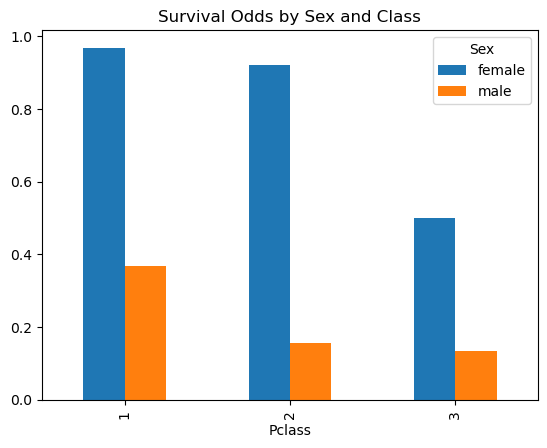

In [45]:
#check out what unstack does in a new cell!
survived_by_class_and_sex.unstack().plot(kind='bar',title='Survival Odds by Sex and Class')

### Subsetting the data is also simple

In [101]:
under_30=df[(df['Age']<30)&(df['Sex']=='female')]
under_30.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [51]:
below_average_fare = df[df['Fare']<df['Fare'].mean()]
below_average_fare.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [52]:
#Cherbourg is in France
males_from_france = df[(df['Embarked']=='C')&(df['Sex']=='male')]
males_from_france.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [53]:
#use the isnull() method on a Series to get NaNs
survivors_unknown_age=df[(df['Age'].isnull())&(df['Survived']==1)]
survivors_unknown_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q


### We can also create new columns! Let's count the reverends on board

In [105]:
#define a helper function:
def is_rev(input_name):
    if 'Rev.' in input_name:
        return 1  
    else:
        return 0

df.Name.apply(is_rev)

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    0
Name: Name, Length: 891, dtype: int64

In [153]:
#to define a new column:
df['is_reverend']=df['Name'].apply(is_rev)

In [154]:
df[df['is_reverend']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_reverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,NaN,S,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,NaN,S,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,NaN,S,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,NaN,S,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,1


In [108]:
#check the columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_reverend'],
      dtype='object')

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_reverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Exercises: Investigate the data.
- What is the distribution of ages? Plot it in a histogram. 
- Calculate the number of missing values (NaNs) in a column by filtering the dataframe using .isnull() and then applying len(). 
- Is the age variable missing at random? Create two new dataframes: one with non-NaN ages and one with NaN ages. Use groupby to check the number of survivors across the classes in the different dataframes.
- Fill in missing values in the Age column with a good guess using .fillna() (say with the average of the observed Ages, or for more advanced pythonistas (pandanistas?) with the average of the observed Ages in each Pclass). 

----


In [69]:
df.Age = df.Age.fillna(df.Age.mean())

In [70]:
missing = df[df['Age'].isnull()]
nonmissing = df[~df['Age'].isnull()]
missing.groupby('Pclass')['Survived'].mean().round(2)

Series([], Name: Survived, dtype: float64)

In [67]:
len(df[df['Age'].isnull()])

177

<Axes: >

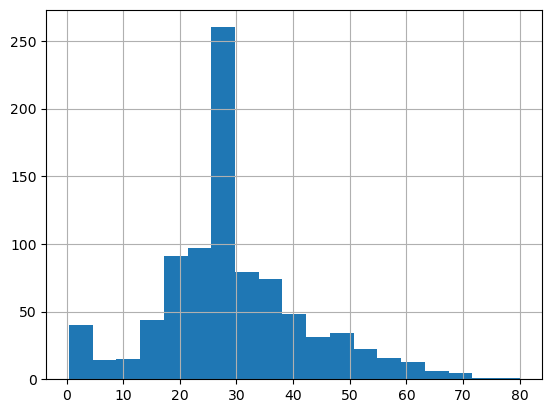

In [74]:
df.Age.hist(bins=19)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


- Add a new column, fancy_title, by writing a function that checks the passenger name for a fancy title like "Master" or "Colonel" or "Count".
- Create a new column, family_on_board, by consider both the SibSp and Parch columns. Do this rather in two steps: create a new column family_size that sums the entries in the SibSp and Parch columns. Then write a function that operates only on family_size, returning 1 if family_size >=1, else 0, and apply it to create family_on_board. (Advanced: google how one would apply a function with inputs from multiple columns. it is a bit more challenging!) 
- Create an original column of your own from any column(s).

---
- get into groupby: figure out how to groupby multiple columns with multiple aggregation functions: i.e. groupby Pclass and calculate the mean and variance of Fare and the count of is_reverend. Experiment!
- plot your data, check out the .corr() dataframe method, and make some hypotheses: besides class and gender, what predicted survival?

---
- Advanced: explore the statsmodels package and calculate a simple linear regression to predict survival.

In [79]:
def fancy_title(input_name):
    if 'Master' in input_name:
        return 1
    elif 'Colonel' in input_name:
        return 1
    elif 'Duke' in input_name:
        return 1
    else:
        return 0
df['has_fancy_title'] = df.Name.apply(fancy_title)
df.groupby('has_fancy_title')['Survived'].mean().round(2)

has_fancy_title
0    0.37
1    0.57
Name: Survived, dtype: float64

## New data!
### By some luck we found new data: 418 new passengers! Figure out how to combine the two dataframes, and rerun your favorite analysis above. Hint: look up Pandas concat.

### Unfortunately we do not know if these passengers survived or not. If you had to guess: which passengers do you think survived?

In [59]:
df2= pd.read_csv('data/titanic2.csv')
print(len(df2))
df2.head()

418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
